In [2]:
import time
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import gmean
from statistics import mean
from datetime import date
from yfetch import get_stock_history
from symbols import my_picks

# add more Revolut ETFs
my_picks += ['QDVE.DE', 'SPPY.DE', 'SPPE.DE', 'EHDV.DE', 'NQSE.DE']

In [3]:
hm = {}
for symbol in my_picks:
    tickerData = yf.Ticker(symbol)
    history = get_stock_history(symbol, interval='1wk')
    hm[symbol] = history
    print(f'{symbol}: {len(history)}w')

SPY: 261w
QQQ: 261w
TOPT: 49w
QTOP: 49w
BRK-B: 261w
AJG: 261w
RSG: 261w
SPMO: 261w
MAGS: 129w
FNGS: 261w
UFO: 261w
QTUM: 261w
NUKZ: 88w
SMH: 261w
USD: 261w
NVDA: 261w
AVGO: 261w
TSLA: 261w
MSFT: 261w
GOOG: 261w
AAPL: 261w
AMZN: 261w
META: 261w
CRM: 261w
NFLX: 261w
SHOP: 261w
NET: 261w
PLTR: 261w
NOW: 261w
SNOW: 261w
WDAY: 261w
BKNG: 261w
ISRG: 261w
PPA: 261w
EHF1.DE: 261w
ESIF.DE: 254w
BTC-USD: 261w
GC=F: 261w
Fetched history for QDVE.DE (262 rows)
QDVE.DE: 262w
Fetched history for SPPY.DE (262 rows)
SPPY.DE: 262w
Fetched history for SPPE.DE (262 rows)
SPPE.DE: 262w
Fetched history for EHDV.DE (262 rows)
EHDV.DE: 262w
Fetched history for NQSE.DE (262 rows)
NQSE.DE: 262w
QDVE.DE: 262w
SPPY.DE: 262w
SPPE.DE: 262w
EHDV.DE: 262w
NQSE.DE: 262w


In [4]:
def crunch(history_weeks, weeks=52):
    assert history_weeks > weeks
    rows = []
    for symbol, history in hm.items():
        if len(history) < history_weeks:
            continue    
        history = history.tail(history_weeks)
        sma = history.Close.rolling(window=13).mean().dropna() # 3 months smoothing
        cagr = (sma.iloc[-1] / sma.iloc[0]) ** (weeks / len(sma)) - 1 # annualized change
        changes = history.Close.pct_change(periods=weeks).dropna()
        gmean_change = gmean(1 + changes) - 1 # geometric mean of changes
        std = changes.std()
        rows.append({
            'symbol': symbol,
            'weeks': len(history),
            'CAGR': cagr,
            'median change': changes.median(),
            'gmean change': gmean_change,
            'std': std,
            'gmean/std': gmean_change / std,
        })
    
    df = pd.DataFrame(rows).sort_values(by='gmean/std', ascending=False).reset_index(drop=True)
    display(df)
    f = f'data/stocks-{weeks}w-over-{history_weeks}w.csv'
    df.to_csv(f, index=False)
    print(f'Saved to {f} ({len(df)}/{len(hm)})')


In [8]:

crunch(254, 52) # 1y over 5y

,symbol,weeks,CAGR,median change,gmean change,std,gmean/std
0,AJG,254,0.235285,0.251954,0.248282,0.098429,2.522462
1,EHF1.DE,254,0.117809,0.115729,0.109506,0.059889,1.828477
2,RSG,254,0.230962,0.257670,0.227691,0.139804,1.628646
3,BRK-B,254,0.172996,0.202021,0.169104,0.130016,1.300644
4,AVGO,254,0.556199,0.645287,0.531891,0.412481,1.289493
5,ESIF.DE,254,0.215548,0.215533,0.182974,0.144752,1.264056
6,PPA,254,0.190763,0.171813,0.164131,0.138486,1.185185
7,SPPY.DE,254,0.151113,0.132666,0.141555,0.137494,1.029532
8,QDVE.DE,254,0.214508,0.223244,0.202298,0.211314,0.957331
9,GC=F,254,0.145234,0.116201,0.145066,0.160946,0.901334


Saved to data/stocks-52w-over-254w.csv (39/43)


In [6]:
crunch(104, 13) # 1Q over 2y

,symbol,weeks,CAGR,median change,gmean change,std,gmean/std
0,ESIF.DE,104,0.079975,0.082432,0.080938,0.047249,1.713023
1,GC=F,104,0.081806,0.075413,0.082667,0.056737,1.457023
2,NFLX,104,0.154457,0.126781,0.156993,0.130586,1.202215
3,PPA,104,0.080573,0.089818,0.081666,0.071525,1.141791
4,EHF1.DE,104,0.036018,0.035308,0.036478,0.032201,1.132823
5,EHDV.DE,104,0.055605,0.053201,0.056341,0.051624,1.091377
6,PLTR,104,0.363998,0.370740,0.368537,0.343653,1.072413
7,SPMO,104,0.098156,0.095478,0.099439,0.093925,1.058706
8,RSG,104,0.062136,0.069146,0.062973,0.070320,0.895523
9,AVGO,104,0.182553,0.230684,0.185026,0.212881,0.869153


Saved to data/stocks-13w-over-104w.csv (40/43)


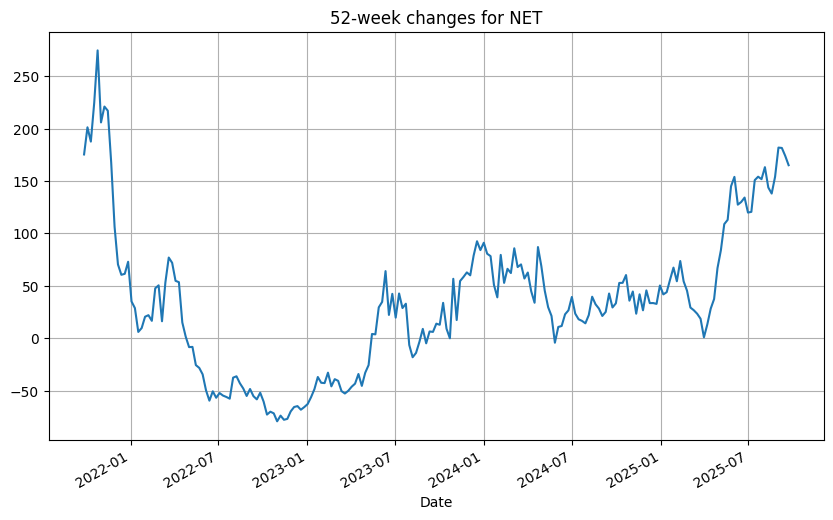

In [7]:
h = hm['NET']
changes = h.Close.pct_change(periods=52).dropna() * 100
changes.plot(title='52-week changes for NET', figsize=(10, 6), grid=True)
plt.show()